**Summary of Results**

I compared the time periods of 1720-1759 (pre-Industrial Revolution) to 1840-1879 (post-Industrial Revolution) to see what kind of impact the Industrial Revolution had on commodities. I focused on 7 commodities which had data representing at least 75% of the years in those periods. All of the data on these 7 commodities came from England. Below are the commodities, their specific type and the impact of the Industrial Revolution:
* Beer - Strong - Average increase of 88% post-Industrial Revolution
* Clothing - Suit - Average increase of 59% post-Industrial Revolution
* Coal - Southern - Average decrease of 3% post-Industrial Revolution **(Unable to reject null hypothesis of equal means)**
* Flour - Wheat - Average increase of 50% post-Industrial Revolution
* Iron - Manufactured - Average decrease of 32% post-Industrial Revolution
* Rent - Housing - Average increase of 196% post-Industrial Revolution
* Tallow - Candle - Average increase of 10% post-Industrial Revolution

I preformed two-sided T-tests for all 7 of these commodities and found significance at the 1% threshold to reject the null hypothesis of equal averages for 6 of the commodities between these two periods. 

Southern Coal was the only commodity which failed to show significance between the two periods. Southern Coal saw a rapid rise in price during the Industrial Revolution but by the end of the 1870s the price had reached historic lows. Expanding the time period post-Industrial Revolution may show that Southern Coal was also impacted by the Industrial Revolution. I believe this had to do with Southern Coal supply being slow to catch up with Industrial Revolution demand.


In [99]:
#importing python modules and checking the data out from Kaggle.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


all_commodities.csv
allen-unger_about.pdf



In [100]:
#Creating a dataframe of the imported data from Kaggle.
dataframe = pd.read_csv('../input/all_commodities.csv')
dataframe.head()

,Item Year,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety
0,1570,7.65,0.703421,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN
1,1571,10.65,0.979272,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN
2,1572,8.90,0.818359,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN
3,1573,7.75,0.684111,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN
4,1574,7.80,0.662043,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN


Standard Value represents prices in grams of silver per litre. The conversions are based on the known quantity of silver in the relevant coinage and the size of the current measure used.

In [101]:
#What kind of types of data do each of the columns contain?
dataframe.dtypes

Item Year              int64
Original Value       float64
Standard Value       float64
Original Currency     object
Standard Currency     object
Orignal Measure       object
Standard Measure      object
Sources               object
Notes                 object
Location              object
Commodity             object
Variety               object
dtype: object

In [102]:
#What are all of the commodities in this dataframe?

#finds the list of unique commodities
list_of_commodities = dataframe.Commodity.unique() 

#sorts the list alphabetically 
list_of_commodities.sort() 

#prints each commodity on a separate row
for commod in list_of_commodities:
    print (commod) 

Allspice
Apples
Ashes
Axe
Bacon
Bark
Barley
Bean
Beans
Beef
Beer
Boards
Books
Boots
Brandy
Bread
Brick
Bricks
Buchwheat
Butter
Cabbage
Candle
Candles
Canvas
Caraway
Carp
Charcoal
Cheese
Chicken
Chickpeas
Chicory
Chocolate
Cider
Cinnamon
Cloth
Clothing
Cloves
Coal
Coalgas
Cocao
Cod
Codfish
Coffee
Copper
Cordage
Cotton
Cream
Currants
Eggs
Firewood
Fish
Flax
Flour
Garbanzo
Gin
Ginger
Glass
Glassware
Goat
Gold
Grain
Grains
Ham
Hay
Herring
Honey
Hops
Horse shoes
Insurance
Iron
Kerosene
Lamb
Lard
Lead
Lime
Linen
Maize
Malmsey
Maple Syrup
Meal
Meat
Milk
Millet
Miso
Molasses
Mortar
Mustard
Mutton
Nails
Nutmeg
Oatmeal
Oats
Oil
Oilcake
Oranges
Ox
Paper
Parchment
Peas
Peat
Pepper
Pewter
Pie Fruits
Pike
Plum
Pork
Pork Mess
Potato
Poultry
Print
Quicksilver
Raisins
Rent
Rice
Rum
Rye
Saffron
Sake
Salmon
Salt
Sausage
Saw
Scythe
Sheeting
Shoes
Shot
Shovel
Silk
Slave
Soap
Socks
Sorghum
Soy
Soya Sauce
Soybean
Speck
Spelt
Spirits
Stockfish
Stockings
Straw
Suet
Sugar
Tallow
Tar
Tax
Tea
Tiles
Tobacco
Transp

In [103]:
#I'm curious how many years we have commodity data for in this data set 
#I'll use groupby to find the minimum and maximum years for each commodity
df = dataframe.groupby('Commodity').agg({'Item Year':['min', 'max']})
print(df.head())

          Item Year      
                min   max
Commodity                
Allspice       1792  1860
Apples         1792  1909
Ashes          1790  1871
Axe            1651  1940
Bacon          1712  1900


In [104]:
#Groupby is the easiest way to get the data I was looking for but I want to get practice
#combining dataframes so I'll create 2 dataframes and merge them
commodities_min = dataframe.groupby(["Commodity"])["Item Year"].min()
commodities_max = dataframe.groupby(["Commodity"])["Item Year"].max()

In [105]:
#I'll use pd.concat to combine the two dataframes using a list of the commodities as the key
commodity_years = pd.concat([commodities_min, commodities_max], axis=1, keys=list_of_commodities)

#I'll rename the columns to better explain what they are
commodity_years.columns = ['First Year', 'Last Year']

#reset.index turns index back into a column
commodity_years = commodity_years.reset_index() 

#I'll create a new column with the total span of years the commodity data represents
commodity_years['Total Years'] = commodity_years['Last Year'] - commodity_years['First Year']
commodity_years.head()

,Commodity,First Year,Last Year,Total Years
0,Allspice,1792,1860,68
1,Apples,1792,1909,117
2,Ashes,1790,1871,81
3,Axe,1651,1940,289
4,Bacon,1712,1900,188


**What commodities do we have the greatest span of years of data on?**

In [106]:
commodity_years.sort_values(['Total Years','Commodity'], ascending=[False, True]).head()

,Commodity,First Year,Last Year,Total Years
113,Rice,965,1926,961
27,Cheese,1209,1983,774
34,Cloth,1209,1940,731
19,Butter,1261,1983,722
142,Sugar,1265,1983,718


**What commodities do we have the least span of years of data on?**

In [107]:
commodity_years.sort_values(['Total Years','Commodity'], ascending=[True, True]).head()

,Commodity,First Year,Last Year,Total Years
50,Fish,1494,1500,6
120,Sausage,1492,1501,9
44,Cordage,1847,1860,13
68,Insurance,1914,1940,26
108,Poultry,1818,1850,32


We have the most years of data on Rice. I'm curious what the history of rice prices looks like, let's take a tangent away from the industrial revolution impact on commodities and look into this.

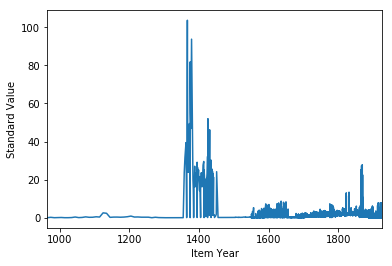

In [108]:
#We'll create a separate dataframe for rice and set the years as an index and plot the data
rice_dataframe = dataframe[dataframe.Commodity == "Rice"].sort_values(['Item Year'], ascending=[True])
rice_dataframe= rice_dataframe.set_index(['Item Year'])
rice_dataframe['Standard Value'].plot()
plt.ylabel('Standard Value')

The graph of the historical rice prices is interesting. There's a large spike from around 1340-1460 in the price of rice. Could this be because of some error in the data or was it caused by something in particular?

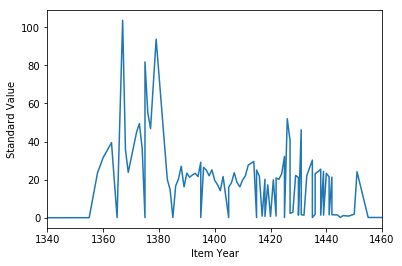

In [109]:
#Let's hone in on the range from 1340 - 1460 and see what the data looks like
rice_dataframe['Standard Value'].plot()
axes = plt.gca()
axes.set_xlim([1340,1460])
plt.ylabel('Standard Value')

The price of rice is highly volatile during the range of 1340-1460 jumping between very high and low prices. Let's see what the source of the data is from 1340-1460.

I stopped to do a bit of research on this time period to see if there might be an explanation. I considered it could be caused by the Bubonic Plague which struck Europe in 1346–1353 but this does not explain the continued price increases through the early 1400s. Another possible explanation is the Hundred Years' War between England and France from 1337 to 1453. But both of these are European-centric explanations and rice is not a traditionally European commodity.


In [110]:
#We'll create a new dataframe focused on rice during this period and then look at
#the locations with the highest standard value.
rice_dataframe_middle_ages = rice_dataframe.loc[1340:1460]
rice_dataframe_middle_ages.sort_values(['Standard Value'], ascending=[False]).head()

,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety
Item Year,,,,,,,,,,,
1367,18.2,103.655012,Navarrese penny,Silver,Navarre Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Navarre,Rice,NaN
1379,20.0,93.735677,Navarrese penny,Silver,Navarre Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Navarre,Rice,NaN
1375,18.0,81.805659,Navarrese penny,Silver,Navarre Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Navarre,Rice,NaN
1376,14.0,55.254695,Navarrese penny,Silver,Navarre Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Navarre,Rice,NaN
1426,36.0,52.034302,Navarrese penny,Silver,Navarre Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Navarre,Rice,NaN


Looking at the highest prices during the timeframe of 1340-1460 shows that a single location, Navarre (located in Spain) is responsible for the most expensive prices for Rice. Let's remove Navarre and repeat that analysis.

In [111]:
#removes Navarre from the dataframe
rice_dataframe_middle_ages[rice_dataframe_middle_ages.Location != "Navarre"].sort_values(['Standard Value'], ascending=[False]).head()

,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety
Item Year,,,,,,,,,,,
1428,6.0,2.910094,Valencian Penny,Silver,Valencia Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Valencia,Rice,NaN
1427,5.0,2.425078,Valencian Penny,Silver,Valencia Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Valencia,Rice,NaN
1436,4.0,1.940063,Valencian Penny,Silver,Valencia Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Valencia,Rice,NaN
1450,4.1,1.933326,Valencian Penny,Silver,Valencia Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Valencia,Rice,NaN
1431,3.5,1.697555,Valencian Penny,Silver,Valencia Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Valencia,Rice,NaN


Now we see the highest prices actually come from Valencia (also located in Spain), but they're significantly lower than the prices seen in Navarre. Navarre may be an outlier for rice prices, let's see if the prices during that period are as high excluding Navarre.

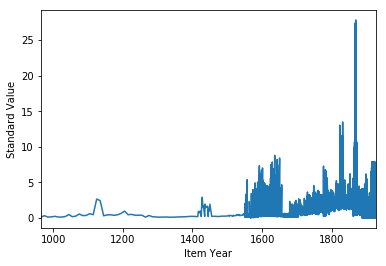

In [112]:
#Graphing the prices for the history of rice excluding Navarre
rice_dataframe[rice_dataframe.Location != "Navarre"]['Standard Value'].plot()
plt.ylabel('Standard Value')

Removing Navarre removes much of the volatility around 1340-1460. Let's look specifically at the 1340-1460 period again.

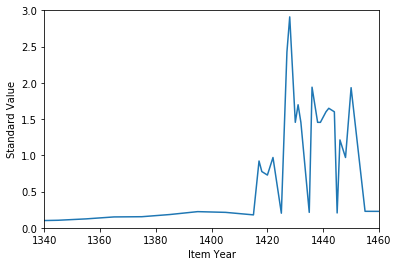

In [113]:
#removing Navarre from the data and focusing on the specific period.
rice_dataframe[rice_dataframe.Location != "Navarre"]['Standard Value'].plot()
axes = plt.gca()
axes.set_xlim([1340,1460])
axes.set_ylim([0,3])
plt.ylabel('Standard Value')

There's much less volatility without Navarre but there's still some unusual volatility in the 1400s. Let's look at the data again.

In [114]:
rice_dataframe_middle_ages[rice_dataframe_middle_ages.Location != "Navarre"]

,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety
Item Year,,,,,,,,,,,
1345,10.40,0.104000,Silver,Silver,Hectolitre,Litre,(Peng Xinwei) (Monetary History of China) (Sha...,(gpih.ucdavis.edu),Shanghai,Rice,Peng
1355,12.30,0.123000,Silver,Silver,Hectolitre,Litre,(Peng Xinwei) (Monetary History of China) (Sha...,(gpih.ucdavis.edu),Shanghai,Rice,Peng
1365,15.00,0.150000,Silver,Silver,Hectolitre,Litre,(Peng Xinwei) (Monetary History of China) (Sha...,(gpih.ucdavis.edu),Shanghai,Rice,Peng
1375,15.30,0.153000,Silver,Silver,Hectolitre,Litre,(Peng Xinwei) (Monetary History of China) (Sha...,(gpih.ucdavis.edu),Shanghai,Rice,Peng
1385,18.30,0.183000,Silver,Silver,Hectolitre,Litre,(Peng Xinwei) (Monetary History of China) (Sha...,(gpih.ucdavis.edu),Shanghai,Rice,Peng
1395,22.30,0.223000,Silver,Silver,Hectolitre,Litre,(Peng Xinwei) (Monetary History of China) (Sha...,(gpih.ucdavis.edu),Shanghai,Rice,Peng
1405,21.30,0.213000,Silver,Silver,Hectolitre,Litre,(Peng Xinwei) (Monetary History of China) (Sha...,(gpih.ucdavis.edu),Shanghai,Rice,Peng
1415,17.83,0.178300,Silver,Silver,Hectolitre,Litre,(Peng Xinwei) (Monetary History of China) (Sha...,(gpih.ucdavis.edu),Shanghai,Rice,Peng
1417,1.90,0.921530,Valencian Penny,Silver,Valencia Pound,Kilogram,(Earl J. Hamilton) (Money Prices and Wages in ...,(gpih.ucdavis.edu)-(L.A.Abad_2005),Valencia,Rice,NaN


The prices during the period of 1350-1450 only come from Valencia and Shanghai. The prices between these two points are drastically different which isn't surprising considering how far apart they are. The impact of location on commodity prices is something to keep in mind.

**What are all of the locations that the rice commodity data is sourced from? How many data points do we have for each location?**

In [115]:
#Counts the frequency of each location in the rice dataframe
rice_dataframe['Location'].value_counts()

Milan            266
Modena           145
Valencia         140
Barcelona        125
Shanghai         110
Osaka            108
Paris             95
Andalusia         71
Navarre           66
Massachusetts     57
Bardwan           55
Bogra             55
Bankura           55
San Francisco     54
Chittagong        53
Backerganj        53
Jessore           53
Dacca             53
Birbhum           53
Faridpur          53
Goalpara          53
Cachar            53
Calcutta          53
Hooghly           53
Bassein           52
Kyaukpyu          52
Akyab             52
Toungoo           52
Kamrup            51
New Castile       47
Thayetmyo         46
Henzada           42
Tokyo             39
Bamo              25
Lakhimpur         16
Wallachia         14
Beijing           12
Santiago          12
Buenos Aires      10
Name: Location, dtype: int64

We have a lot of datapoints on rice, but is it the most likely commodity to demonstrate the impact of the industrial revolution? Probably not. The most important technological improvements from the industrial revolution occurred in textiles, steam power and iron making. Perhaps it makes more sense to take a look at the price of **cloth** since it was the commodity with the 3rd longest stretch of data points. The Industrial Revolution was the transition to new manufacturing processes in the period from about 1760 to sometime between 1820 and 1840.

**Let's take a look at cloth in the period of 1720-1759 (prior to the industrial revolution), the period of 1760-1839 (the general period of the industrial revolution) and the period of 1840-1879 (immediately after the industrial revolution)**

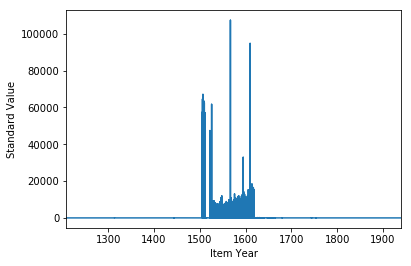

In [116]:
#Creating a cloth dataframe and graphing all of the years of data
cloth_dataframe = dataframe[dataframe.Commodity == "Cloth"].sort_values(['Item Year'], ascending=[True])
cloth_dataframe = cloth_dataframe.set_index(['Item Year'])
cloth_dataframe['Standard Value'].plot()
plt.ylabel('Standard Value')

~1500-1620 is an outlier for our cloth data and it isn't necessary to answer the question about the Industrial Revolution. Let's re-graph the data starting in 1650.

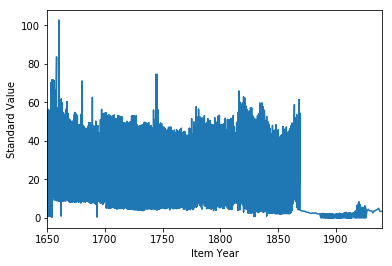

In [117]:
#graphing the data from 1650 and beyond.
cloth_dataframe2 = cloth_dataframe.loc[1650:]
cloth_dataframe2['Standard Value'].plot()
plt.ylabel('Standard Value')

The value of cloth from the 1650s and on is also highly volatile. Perhaps it makes sense to focus on a specific region since we know location can heavily impact price of a commodity. It's also interesting to see the price of cloth fall dramatically and stay low after around 1860s. That could potentially be the effect of the industrial revolution on shipping or a change in the source of data.

In [118]:
#Let's hone in on a specific region. What region has the most data points?
cloth_dataframe2['Location'].value_counts()

England          552
Milan            442
Vermont          137
Istanbul         119
Santiago          92
Modena            74
Tokyo             66
Arequipa          49
Massachusetts     29
Sopron            20
Paris              3
Name: Location, dtype: int64

Let's simplify the analysis by focusing on England since we have the most data points from 1650 and beyond.

In [119]:
#Creating a cloth dataframe with just the data from England.
cloth_dataframe3 = cloth_dataframe2[cloth_dataframe2.Location == "England"]
cloth_dataframe3.head()

,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety
Item Year,,,,,,,,,,,
1650,17.718594,8.849047,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Linen
1650,9.177168,54.999136,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Wool
1651,9.406686,56.374644,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Wool
1651,18.717662,9.348003,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Linen
1652,9.278229,55.604798,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Wool


In [120]:
#The period of 1720-1759 (prior to the industrial revolution)
cloth_dataframe_pre_rev = cloth_dataframe3.loc[1720:1759]

#The period of 1760-1839 (the general period of the industrial revolution)
cloth_dataframe_ind_rev = cloth_dataframe3.loc[1760:1839]

#The period of 1840-1879 (immediately after the industrial revolution)
cloth_dataframe_post_rev = cloth_dataframe3.loc[1840:1879]

In [121]:
#Let's take a quick look at some summary statistics on each time period dataframe.
cloth_dataframe_pre_rev['Standard Value'].describe()

count    87.000000
mean     31.131454
std      19.034049
min       9.982217
25%      10.810663
50%      42.000066
75%      48.663476
max      56.099235
Name: Standard Value, dtype: float64

In [122]:
#Let's take a quick look at some summary statistics on each time period dataframe.
cloth_dataframe_ind_rev['Standard Value'].describe()

count    238.000000
mean      32.460728
std       18.275448
min        9.133649
25%       10.658870
50%       40.713921
75%       48.305737
max       66.008976
Name: Standard Value, dtype: float64

In [123]:
#Let's take a quick look at some summary statistics on each time period dataframe.
cloth_dataframe_post_rev['Standard Value'].describe()

count    87.000000
mean     23.395692
std      18.044313
min       6.640302
25%       9.162848
50%      12.561157
75%      44.934058
max      61.373106
Name: Standard Value, dtype: float64

It's interesting to see the mean price of cloth rise moderately during the Industrial Revolution but fall dramatically after the Industrial Revolution. This makes some sense.

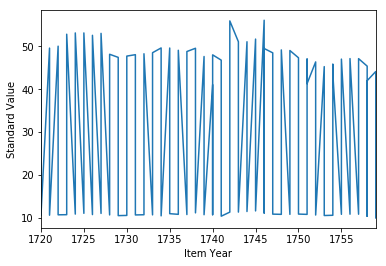

In [124]:
#Let's plot the data of each time period for cloth.
cloth_dataframe_pre_rev['Standard Value'].plot()
plt.ylabel('Standard Value')

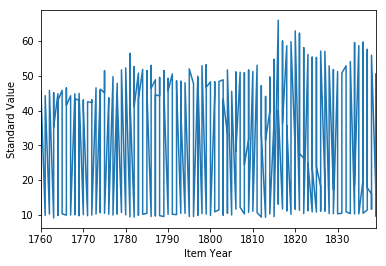

In [125]:
#Let's plot the data of each time period for cloth.
cloth_dataframe_ind_rev['Standard Value'].plot()
plt.ylabel('Standard Value')

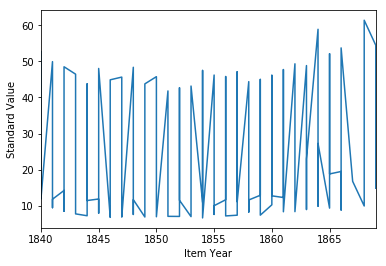

In [126]:
#Let's plot the data of each time period for cloth.
cloth_dataframe_post_rev['Standard Value'].plot()
plt.ylabel('Standard Value')

This is very strage. Why do the prices bounce between low and high prices? A closer look at the cloth dataframe head shows that the cloth data encompasses both linen and wool cloth. Let's focus on linen and repeat the process.

In [127]:
#Creating a cloth dataframe looking at only linen cloth in England.
cloth_dataframe4 = cloth_dataframe3[cloth_dataframe3.Variety == "Linen"]
cloth_dataframe4.head()

,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety
Item Year,,,,,,,,,,,
1650,17.718594,8.849047,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Linen
1651,18.717662,9.348003,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Linen
1652,17.718594,8.849047,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Linen
1653,18.403053,9.190881,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Linen
1654,17.315752,8.647859,English Pence,Silver,England British yard,Metre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cloth,Linen


In [128]:
#The period of 1720-1759 (prior to the industrial revolution)
cloth_dataframe_pre_rev2 = cloth_dataframe4.loc[1720:1759]

#The period of 1760-1839 (the general period of the industrial revolution)
cloth_dataframe_ind_rev2 = cloth_dataframe4.loc[1760:1839]

#The period of 1840-1879 (immediately after the industrial revolution)
cloth_dataframe_post_rev2 = cloth_dataframe4.loc[1840:1879]

In [129]:
#Let's take a quick look at some summary statistics on each time period dataframe.
cloth_dataframe_pre_rev2['Standard Value'].describe()

count    40.000000
mean     10.796078
std       0.309030
min       9.982217
25%      10.645122
50%      10.761484
75%      10.873100
max      11.616047
Name: Standard Value, dtype: float64

In [130]:
#Let's take a quick look at some summary statistics on each time period dataframe.
cloth_dataframe_ind_rev2['Standard Value'].describe()

count    80.000000
mean     10.357737
std       0.708890
min       9.133649
25%       9.924160
50%      10.269811
75%      10.658870
max      13.157041
Name: Standard Value, dtype: float64

In [131]:
#Let's take a quick look at some summary statistics on each time period dataframe.
cloth_dataframe_post_rev2['Standard Value'].describe()

count    28.000000
mean      8.126076
std       1.294219
min       6.640302
25%       7.071510
50%       7.682877
75%       8.868753
max      11.864950
Name: Standard Value, dtype: float64

Repeating the exercise and focusing just on linen cloth reveals the average price of linen cloth declining slightly during the Industrial Revolution and then dramatically after the Industrial Revolution

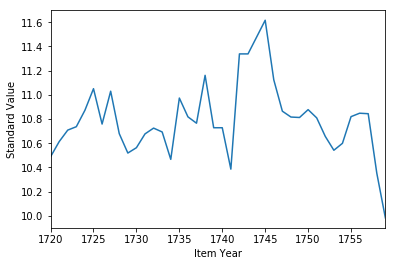

In [132]:
#Let's plot the data of each time period for cloth.
cloth_dataframe_pre_rev2['Standard Value'].plot()
plt.ylabel('Standard Value')

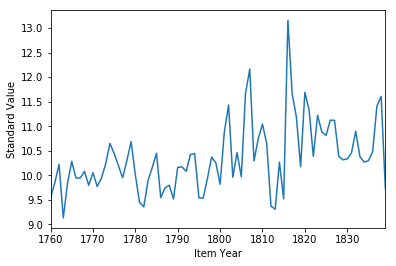

In [133]:
#Let's plot the data of each time period for cloth.
cloth_dataframe_ind_rev2['Standard Value'].plot()
plt.ylabel('Standard Value')

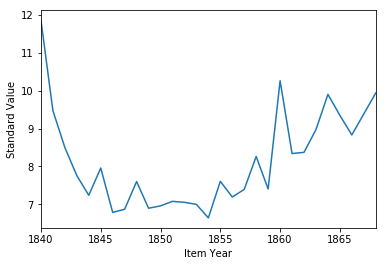

In [134]:
#Let's plot the data of each time period for cloth.
cloth_dataframe_post_rev2['Standard Value'].plot()
plt.ylabel('Standard Value')

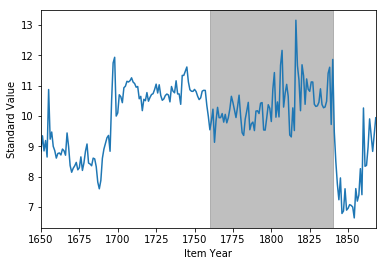

In [135]:
#This is a graph of linen cloth in England before, during and after the Industrial Revolution
#Grey highlighting shows the period of the Industrial Revolution.
cloth_dataframe4['Standard Value'].plot()
plt.axvspan(1760, 1840, alpha=0.5, color='grey')
plt.ylabel('Standard Value')

Focusing on linen cloth and the England market produces a much more consistent graph. It's very interesting that the price of cloth begins to pick up after 1850 but unfortunately we don't have much information beyond 1875 for England it looks like. 

I'm curious if we can identify some commodities that were not affected by the industrial revolution. Perhaps we should look at the average prices for commodities by location, commodity and commodity type having data points for at least 75% of the years in **1720-1759 **(prior to the industrial revolution), ** 1760-1839** (the general period of the industrial revolution) and **1840-1879** (immediately after the industrial revolution). Once we know which commodities we have sufficient data on we can dig into analyzing those commodities.

In [136]:
#Setting the year as the index
dataframe2 = dataframe.sort_values(['Item Year'], ascending=[True]).set_index(['Item Year'])

#Creating a new dataframe with data to be analyzed for the Industrial Revolution
dataframe3 = dataframe2.loc[1720:1879]

#The period of 1720-1759 (prior to the industrial revolution)
pre_revolution = dataframe2.loc[1720:1759]

#The period of 1760-1839 (the general period of the industrial revolution)
ind_revolution = dataframe2.loc[1760:1839]

#The period of 1840-1879 (immediately after the industrial revolution)
post_revolution = dataframe2.loc[1840:1879]

In [137]:
#Let's group the data by commodity, then variety and then by location. 
#We'll calculate the mean, median, standard deviation and count from the Standard Value.
pre_revolution2 = pre_revolution.groupby(['Commodity','Variety','Location'], as_index=False).agg({'Standard Value':['mean', 'median', 'std', 'count']})

#Let's hone in only on data which represents 75% of the 40 year period (or 30 years)
pre_revolution3 = pre_revolution2[pre_revolution2['Standard Value']['count']>=30]

#columns.raval offers an easy way to get rid of the 2 levels of columns that show up from groupby
#when we don't make the groupby into an index
pre_revolution3.columns = ["".join(x) for x in pre_revolution3.columns.ravel()]
pre_revolution3.head()

,Commodity,Variety,Location,Standard Valuemean,Standard Valuemedian,Standard Valuestd,Standard Valuecount
1,Barley,Gerste,Vienna,0.213726,0.215331,0.059157,40
4,Bean,Fave,Pisa,0.224429,0.222388,0.048518,40
5,Bean,Vetches,Pisa,0.224999,0.223721,0.057390,40
11,Beer,Strong,England,1.281021,1.287010,0.050644,40
17,Candles,Tallow,Paris,4.632109,4.661005,0.632336,38


In [138]:
#Let's group the data by commodity, then variety and then by location. 
#We'll calculate the mean, median, standard deviation and count from the Standard Value.
ind_revolution2 = ind_revolution.groupby(['Commodity','Variety','Location'], as_index=False).agg({'Standard Value':['mean', 'median', 'std', 'count']})

#Let's hone in only on data which represents 75% of the 40 year period (or 60 years)
ind_revolution3 = ind_revolution2[ind_revolution2['Standard Value']['count']>=60]

#columns.raval offers an easy way to get rid of the 2 levels of columns that show up from groupby
#when we don't make the groupby into an index
ind_revolution3.columns = ["".join(x) for x in ind_revolution3.columns.ravel()]
ind_revolution3.head()

,Commodity,Variety,Location,Standard Valuemean,Standard Valuemedian,Standard Valuestd,Standard Valuecount
8,Beer,Strong,England,1.852667,1.639733,0.529627,80
23,Cloth,Cotton,England,37.553295,40.713921,12.391055,78
27,Cloth,Linen,England,10.357737,10.269811,0.708890,80
28,Cloth,Linen,Milan,6.755213,6.419630,1.302280,80
32,Cloth,Wool,England,49.598465,47.614592,5.836974,80


In [139]:
#Let's group the data by commodity, then variety and then by location. 
#We'll calculate the mean, median, standard deviation and count from the Standard Value.
post_revolution2 = post_revolution.groupby(['Commodity','Variety','Location'], as_index=False).agg({'Standard Value':['mean', 'median', 'std', 'count']})

#Let's hone in only on data which represents 75% of the 40 year period (or 30 years)
post_revolution3 = post_revolution2[post_revolution2['Standard Value']['count']>=30]

#columns.raval offers an easy way to get rid of the 2 levels of columns that show up from groupby
#when we don't make the groupby into an index
post_revolution3.columns = ["".join(x) for x in post_revolution3.columns.ravel()]
post_revolution3.head()

,Commodity,Variety,Location,Standard Valuemean,Standard Valuemedian,Standard Valuestd,Standard Valuecount
0,Apples,Dried,Vermont,3.803751,3.222201,1.779208,40
1,Beef,Dressed,Vermont,3.287550,3.038730,1.140702,40
3,Beer,Strong,England,2.403061,2.424688,0.173811,30
4,Boots,Leather,Vermont,81.827581,72.536905,21.637085,40
9,Bread,White,Ghent,1.714725,1.680750,0.230023,40


In [140]:
#Merging the 3 dataframes into a single dataframe to find the commodities with adequate data
#across all 3 time periods
consol_df = pd.merge(pre_revolution3, ind_revolution3, on=['Commodity','Variety','Location'], how='inner', suffixes=('_Pre_Rev', '_Ind_Rev'))
consol_df = pd.merge(consol_df, post_revolution3, on=['Commodity','Variety','Location'], how='inner', suffixes=('_Ind_Rev', '_Post_Rev'))

In [141]:
#renaming the columns to be more easily read
consol_df = consol_df.rename(columns={'Commodity': 'Commodity', 
                                     'Variety': 'Variety',
                                     'Location': 'Location',
                                     'Standard Value_mean_Pre_Rev': 'Std_Val_Pre_Rev_mean',
                                     'Standard Value_median_Pre_Rev': 'Std_Val_Pre_Rev_median',
                                     'Standard Value_std_Pre_Rev': 'Std_Val_Pre_Rev_std',
                                     'Standard Value_count_Pre_Rev': 'Std_Val_Pre_Rev_count',
                                     'Standard Value_mean_Ind_Rev': 'Std_Val_Ind_Rev_mean',
                                     'Standard Value_median_Ind_Rev': 'Std_Val_Ind_Rev_median',
                                     'Standard Value_std_Ind_Rev': 'Std_Val_Ind_Rev_std',
                                     'Standard Value_count_Ind_Rev': 'Std_Val_Ind_Rev_count',
                                     'Standard Value_mean': 'Std_Val_Post_Rev_mean',
                                     'Standard Value_median': 'Std_Val_Post_Rev_median',
                                     'Standard Value_std': 'Std_Val_Post_Rev_std',
                                     'Standard Value_count': 'Std_Val_Post_Rev_count'})

#Let's look at the entire consolidated dataframe
consol_df

,Commodity,Variety,Location,Standard Valuemean_Pre_Rev,Standard Valuemedian_Pre_Rev,Standard Valuestd_Pre_Rev,Standard Valuecount_Pre_Rev,Standard Valuemean_Ind_Rev,Standard Valuemedian_Ind_Rev,Standard Valuestd_Ind_Rev,Standard Valuecount_Ind_Rev,Standard Valuemean,Standard Valuemedian,Standard Valuestd,Standard Valuecount
0,Beer,Strong,England,1.281021,1.287010,0.050644,40,1.852667,1.639733,0.529627,80,2.403061,2.424688,0.173811,30
1,Clothing,Suit,England,187.592419,182.751433,19.615066,40,261.389088,241.777718,46.818018,80,299.200199,292.866692,29.313916,30
2,Coal,Southern,England,94.490612,90.488410,8.977912,40,125.542507,118.510728,21.696857,80,91.723164,84.454962,16.077873,30
3,Flour,Wheat,England,1.373530,1.292907,0.281865,38,2.357026,2.148089,0.727114,80,2.057781,2.036697,0.421155,30
4,Iron,Manufactured,England,3.605229,3.656169,0.303056,40,3.874967,3.761616,0.879902,76,2.446345,2.349559,0.396744,30
5,Rent,Housing,England,139.881306,139.530582,7.054421,40,268.663994,243.942448,103.368003,80,414.521903,402.931757,29.914709,30
6,Tallow,Candle,England,5.920321,5.993136,0.680863,40,7.961329,7.374586,1.538336,80,6.482931,6.625398,0.641789,30


Interestingly there are only 7 commodities that have significant data across all 3 time frames in England. Let's graph all 3 and then perform t-tests on the means to see if the difference in prices is statistically significant.

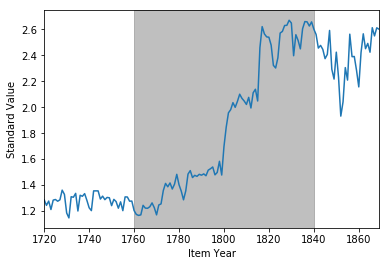

In [142]:
#Chart of Beer, Strong, England from 1720 - 1879

#Creating a new dataframe using 3 lines of code. 
beer_df = dataframe3[dataframe3.Commodity == 'Beer']
beer_df = beer_df[beer_df.Variety == 'Strong']
beer_df = beer_df[beer_df.Location == 'England']

#Plotting the graph of the data and highlighting in grey the Industrial Revolution
beer_df['Standard Value'].plot()
plt.axvspan(1760, 1840, alpha=0.5, color='grey')
plt.ylabel('Standard Value')

In [143]:
#Creating the pre- and post-Industrial Revolution dataframes using 1 line of code 
pre_beer = pre_revolution['Standard Value'][(pre_revolution['Commodity']=='Beer') & (pre_revolution['Variety']=='Strong') & (pre_revolution['Location']=='England')]
post_beer = post_revolution['Standard Value'][(post_revolution['Commodity']=='Beer') & (post_revolution['Variety']=='Strong') & (post_revolution['Location']=='England')]

#Performing the t-test and then also returning the percentage increase in the commodity
ttest_ind(pre_beer, post_beer), "{0:.0f}%".format((post_beer.mean()/pre_beer.mean()-1)*100)

(Ttest_indResult(statistic=-38.775127505661807, pvalue=4.2065822676002825e-48),
 '88%')

* Because the p-value is <1% we reject the null hypothesis of equal averages
* The average price of Strong Beer in England is 88% higher after the Industrial Revolution (1720-1759 to 1841-1879)

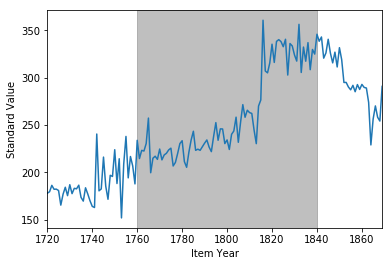

In [144]:
#Chart of Clothing, Suit, England from 1720 - 1879

#Creating a new dataframe using 3 lines of code. 
clothing_df = dataframe3[dataframe3.Commodity == 'Clothing']
clothing_df = clothing_df[clothing_df.Variety == 'Suit']
clothing_df = clothing_df[clothing_df.Location == 'England']

#Plotting the graph of the data and highlighting in grey the Industrial Revolution
clothing_df['Standard Value'].plot()
plt.axvspan(1760, 1840, alpha=0.5, color='grey')
plt.ylabel('Standard Value')

In [145]:
#Creating the pre- and post-Industrial Revolution dataframes using 1 line of code 
pre_clothing = pre_revolution['Standard Value'][(pre_revolution['Commodity']=='Clothing') & (pre_revolution['Variety']=='Suit') & (pre_revolution['Location']=='England')]
post_clothing = post_revolution['Standard Value'][(post_revolution['Commodity']=='Clothing') & (post_revolution['Variety']=='Suit') & (post_revolution['Location']=='England')]

#Performing the t-test and then also returning the percentage increase in the commodity
ttest_ind(pre_clothing, post_clothing), "{0:.0f}%".format((post_clothing.mean()/pre_clothing.mean()-1)*100)

(Ttest_indResult(statistic=-19.070728168230254, pvalue=5.3643912293653751e-29),
 '59%')

* Because the p-value is <1% we reject the null hypothesis of equal averages
* The average price of Suit Clothing in England is 59% higher after the Industrial Revolution (1720-1759 to 1841-1879)

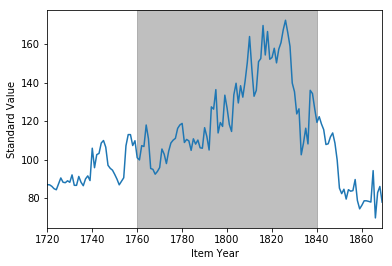

In [146]:
#Chart of Coal, Southern, England from 1720 - 1879

#Creating a new dataframe using 3 lines of code. 
coal_df = dataframe3[dataframe3.Commodity == 'Coal']
coal_df = coal_df[coal_df.Variety == 'Southern']
coal_df = coal_df[coal_df.Location == 'England']

#Plotting the graph of the data and highlighting in grey the Industrial Revolution
coal_df['Standard Value'].plot()
plt.axvspan(1760, 1840, alpha=0.5, color='grey')
plt.ylabel('Standard Value')

In [147]:
#Creating the pre- and post-Industrial Revolution dataframes using 1 line of code
pre_coal = pre_revolution['Standard Value'][(pre_revolution['Commodity']=='Coal') & (pre_revolution['Variety']=='Southern') & (pre_revolution['Location']=='England')]
post_coal = post_revolution['Standard Value'][(post_revolution['Commodity']=='Coal') & (post_revolution['Variety']=='Southern') & (post_revolution['Location']=='England')]

#Performing the t-test and then also returning the percentage increase in the commodity
ttest_ind(pre_coal, post_coal), "{0:.0f}%".format((post_coal.mean()/pre_coal.mean()-1)*100)

(Ttest_indResult(statistic=0.9160216448421693, pvalue=0.36289273186004101),
 '-3%')

* Because the p-value is >1% we **cannot** reject the null hypothesis of equal averages
* The average price of Southern Coal in England is 3% lower after the Industrial Revolution (1720-1759 to 1841-1879)

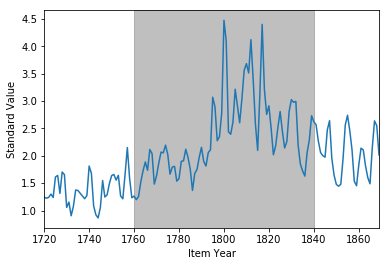

In [148]:
#Chart of Flour, Wheat, England from 1720 - 1879

#Creating a new dataframe using 3 lines of code. 
flour_df = dataframe3[dataframe3.Commodity == 'Flour']
flour_df = flour_df[flour_df.Variety == 'Wheat']
flour_df = flour_df[flour_df.Location == 'England']

#Plotting the graph of the data and highlighting in grey the Industrial Revolution
flour_df['Standard Value'].plot()
plt.axvspan(1760, 1840, alpha=0.5, color='grey')
plt.ylabel('Standard Value')

In [149]:
#Creating the pre- and post-Industrial Revolution dataframes using 1 line of code
pre_flour = pre_revolution['Standard Value'][(pre_revolution['Commodity']=='Flour') & (pre_revolution['Variety']=='Wheat') & (pre_revolution['Location']=='England')]
post_flour = post_revolution['Standard Value'][(post_revolution['Commodity']=='Flour') & (post_revolution['Variety']=='Wheat') & (post_revolution['Location']=='England')]

#Performing the t-test and then also returning the percentage increase in the commodity
ttest_ind(pre_flour, post_flour), "{0:.0f}%".format((post_flour.mean()/pre_flour.mean()-1)*100)

(Ttest_indResult(statistic=-8.0055311799395543, pvalue=2.5879930918287339e-11),
 '50%')

* Because the p-value is <1% we reject the null hypothesis of equal averages
* The average price of Wheat Flour in England is 50% higher after the Industrial Revolution (1720-1759 to 1841-1879)

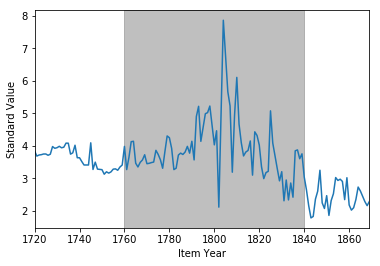

In [150]:
#Chart of Iron, Manufactured, England from 1720 - 1879

#Creating a new dataframe using 3 lines of code. 
iron_df = dataframe3[dataframe3.Commodity == 'Iron']
iron_df = iron_df[iron_df.Variety == 'Manufactured']
iron_df = iron_df[iron_df.Location == 'England']

#Plotting the graph of the data and highlighting in grey the Industrial Revolution
iron_df['Standard Value'].plot()
plt.axvspan(1760, 1840, alpha=0.5, color='grey')
plt.ylabel('Standard Value')

In [151]:
#Creating the pre- and post-Industrial Revolution dataframes using 1 line of code
pre_iron = pre_revolution['Standard Value'][(pre_revolution['Commodity']=='Iron') & (pre_revolution['Variety']=='Manufactured') & (pre_revolution['Location']=='England')]
post_iron = post_revolution['Standard Value'][(post_revolution['Commodity']=='Iron') & (post_revolution['Variety']=='Manufactured') & (post_revolution['Location']=='England')]

#Performing the t-test and then also returning the percentage increase in the commodity
ttest_ind(pre_iron, post_iron), "{0:.0f}%".format((post_iron.mean()/pre_iron.mean()-1)*100)

(Ttest_indResult(statistic=13.862672140377004, pvalue=1.7141682732106354e-21),
 '-32%')

* Because the p-value is <1% we reject the null hypothesis of equal averages
* The average price of Manufactured Iron in England is 32% lower after the Industrial Revolution (1720-1759 to 1841-1879)

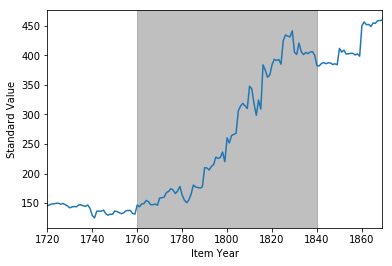

In [152]:
#Chart of Rent, Housing, England from 1720 - 1879

#Creating a new dataframe using 3 lines of code. 
rent_df = dataframe3[dataframe3.Commodity == 'Rent']
rent_df = rent_df[rent_df.Variety == 'Housing']
rent_df = rent_df[rent_df.Location == 'England']

#Plotting the graph of the data and highlighting in grey the Industrial Revolution
rent_df['Standard Value'].plot()
plt.axvspan(1760, 1840, alpha=0.5, color='grey')
plt.ylabel('Standard Value')

In [153]:
#Creating the pre- and post-Industrial Revolution dataframes using 1 line of code
pre_rent = pre_revolution['Standard Value'][(pre_revolution['Commodity']=='Rent') & (pre_revolution['Variety']=='Housing') & (pre_revolution['Location']=='England')]
post_rent = post_revolution['Standard Value'][(post_revolution['Commodity']=='Rent') & (post_revolution['Variety']=='Housing') & (post_revolution['Location']=='England')]

#Performing the t-test and then also returning the percentage increase in the commodity
ttest_ind(pre_rent, post_rent), "{0:.0f}%".format((post_rent.mean()/pre_rent.mean()-1)*100)

(Ttest_indResult(statistic=-56.145638562984253, pvalue=1.0599058142929517e-58),
 '196%')

* Because the p-value is <1% we reject the null hypothesis of equal averages
* The average price of Housing Rent in England is 196% higher after the Industrial Revolution (1720-1759 to 1841-1879)

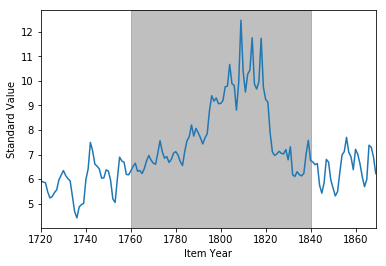

In [154]:
#Chart of Tallow, Candle, England from 1720 - 1879

#Creating a new dataframe using 3 lines of code. 
tallow_df = dataframe3[dataframe3.Commodity == 'Tallow']
tallow_df = tallow_df[tallow_df.Variety == 'Candle']
tallow_df = tallow_df[tallow_df.Location == 'England']

#Plotting the graph of the data and highlighting in grey the Industrial Revolution
tallow_df['Standard Value'].plot()
plt.axvspan(1760, 1840, alpha=0.5, color='grey')
plt.ylabel('Standard Value')

In [155]:
#Creating the pre- and post-Industrial Revolution dataframes using 1 line of code
pre_tallow = pre_revolution['Standard Value'][(pre_revolution['Commodity']=='Tallow') & (pre_revolution['Variety']=='Candle') & (pre_revolution['Location']=='England')]
post_tallow = post_revolution['Standard Value'][(post_revolution['Commodity']=='Tallow') & (post_revolution['Variety']=='Candle') & (post_revolution['Location']=='England')]

#Performing the t-test and then also returning the percentage increase in the commodity
ttest_ind(pre_tallow, post_tallow), "{0:.0f}%".format((post_tallow.mean()/pre_tallow.mean()-1)*100)

(Ttest_indResult(statistic=-3.5056423640720413, pvalue=0.00081124234665670876),
 '10%')

* Because the p-value is <1% we reject the null hypothesis of equal averages
* The average price of Tallow Candles in England is 10% higher after the Industrial Revolution (1720-1759 to 1841-1879)